In [1]:
import glob
import os
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.use('tkAgg')

In [2]:
%matplotlib inline

In [3]:
%cd /mnt/Jonas/Projetos/Artigos/1_Artigo/

/mnt/Jonas/Projetos/Artigos/1_Artigo


/home/jonascgn/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
def obter_arquivos_statistics(base_dir):
    pattern = f"{base_dir}/**/statistics.csv"
    return glob.glob(pattern, recursive=True)  

def _to_float(value) -> float:
    try:
        return float(str(value))
    except ValueError:
        return 0.1

In [5]:
arquivos = obter_arquivos_statistics('simulation')
por_data_hora = defaultdict(list)

for arquivo in arquivos:
    partes = arquivo.split(os.sep)
    if len(partes) >= 5:
        data = f"{partes[1]}/{partes[2]}/{partes[3]}"  # YYYY/MM/DD
        hora = partes[4]  # HHMMSS
        chave = f"{data} {hora}"
        por_data_hora[chave].append(arquivo)

 Simulação       Data   Hora  Duração (h)  Downtime (h)  Disponibilidade (%)  Mean Recovery Time
 ITERACAO1 2025/11/11 100837       1000.0      0.185382            99.981462           11.311450
 ITERACAO2 2025/11/11 100837       1000.0      0.261386            99.973861           14.702951
 ITERACAO3 2025/11/11 100837       1000.0      0.253779            99.974622           12.345985
 ITERACAO4 2025/11/11 100837       1000.0      0.179273            99.982073            9.928961
 ITERACAO5 2025/11/11 100837       1000.0      0.165923            99.983408            8.915239
 ITERACAO6 2025/11/11 100837       1000.0      0.099713            99.990029            6.647529
 ITERACAO7 2025/11/11 100837       1000.0      0.201892            99.979811           11.722752
 ITERACAO8 2025/11/11 100837       1000.0      0.239169            99.976083           15.944576
 ITERACAO9 2025/11/11 100837       1000.0      0.183740            99.981626            9.186986
ITERACAO10 2025/11/11 100837  

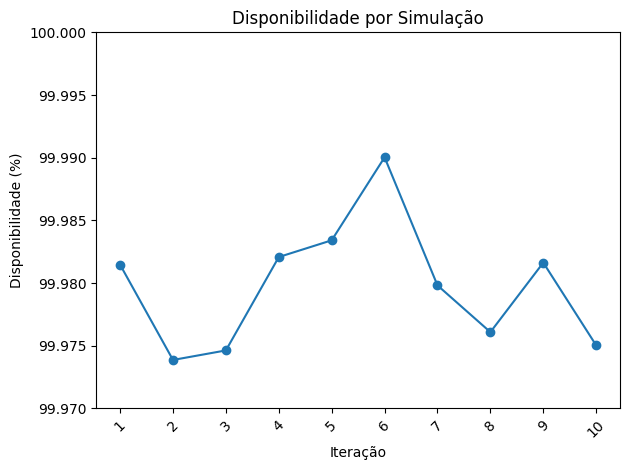

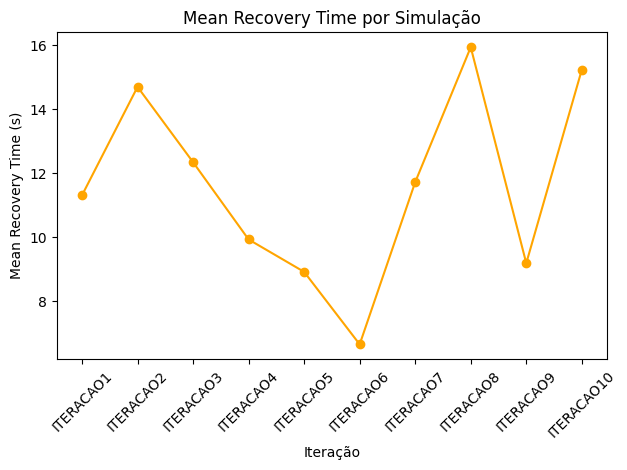

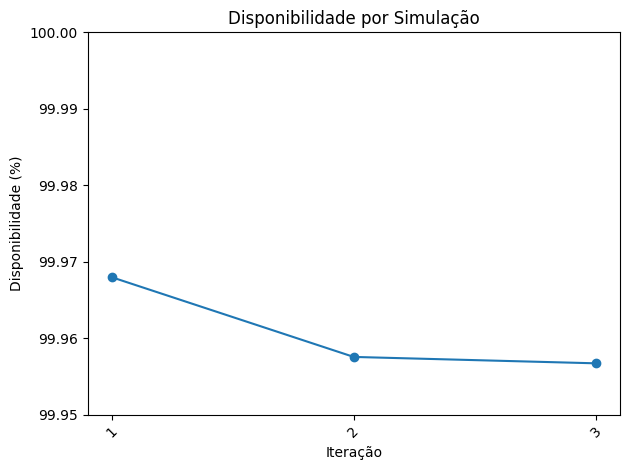

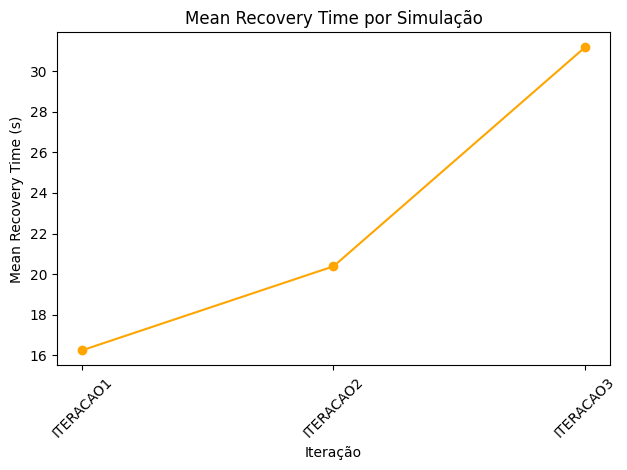

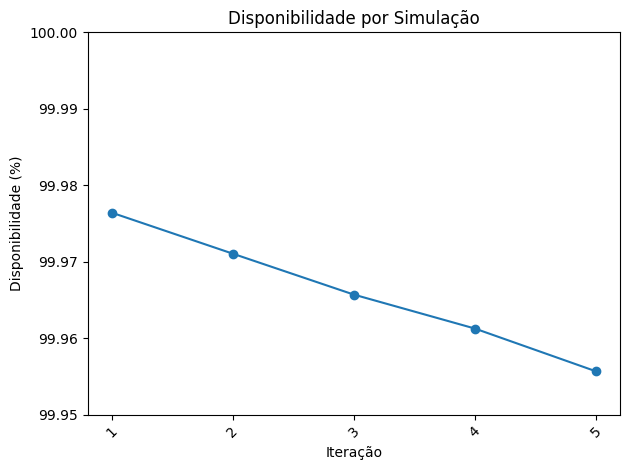

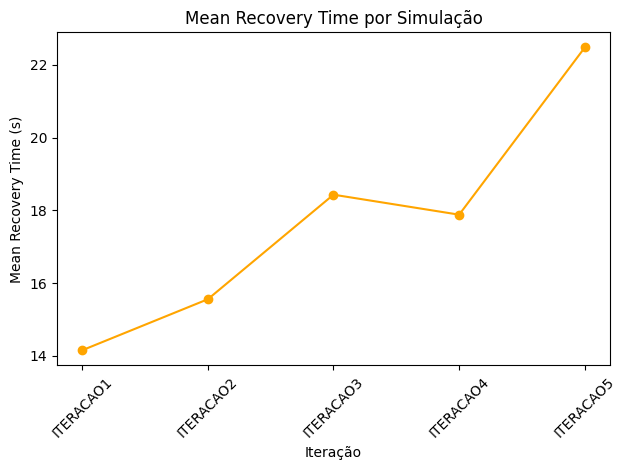

In [6]:

resultados = []

for chave, lista in por_data_hora.items():
    data, hora = chave.split()
    if len(lista) >= 3:
        for arq in lista:
            df = pd.read_csv(arq)
            nome_simulacao = os.path.basename(os.path.dirname(arq))
            metricas = dict(zip(df.iloc[:,0], df.iloc[:,1]))
            if "duration_hours" in metricas and "total_downtime" in metricas:
                duracao = metricas["duration_hours"]
                downtime = metricas["total_downtime"]
                disponibilidade = (1 - (_to_float(downtime) / _to_float(duracao))) * 100
                mean_recovery_time = metricas.get("mean_recovery_time", None)
                resultados.append({
                    "Simulação": nome_simulacao,
                    "Data": data,
                    "Hora": hora,
                    "Duração (h)": duracao,
                    "Downtime (h)": downtime,
                    "Disponibilidade (%)": disponibilidade,
                    "Mean Recovery Time": mean_recovery_time
                })
        if resultados:
            df_resultados = pd.DataFrame(resultados)

            # Gráfico de disponibilidade por simulação
            plt.figure()
            plt.plot(df_resultados["Simulação"].str.extract(r'(\d+)')[0].astype(int), df_resultados["Disponibilidade (%)"], marker='o')
            plt.xticks(df_resultados["Simulação"].str.extract(r'(\d+)')[0].astype(int)) 
            plt.title("Disponibilidade por Simulação")
            plt.xlabel("Iteração")
            plt.ylabel("Disponibilidade (%)")
            # Define o limite inferior do eixo y como o mínimo arredondado para baixo (sempre pra menos)
            plt.ylim(np.floor(df_resultados["Disponibilidade (%)"].min()*100)/100, 100) 
            plt.xticks(rotation=45)
            plt.tight_layout()
            # plt.savefig("disponibilidade_por_simulacao.png")
            # plt.show()

            # Gráfico de mean_recovery_time por simulação
            plt.figure()
            plt.plot(df_resultados["Simulação"], df_resultados["Mean Recovery Time"], marker='o', color='orange')
            plt.title("Mean Recovery Time por Simulação")
            plt.xlabel("Iteração")
            plt.ylabel("Mean Recovery Time (s)")
            plt.xticks(rotation=45)
            plt.tight_layout()
            # plt.savefig("mean_recovery_time_por_simulacao.png")
            # plt.show()

            print(df_resultados.to_string(index=False))
            resultados = []

In [7]:

arquivos = obter_arquivos_statistics('simulation')
por_data_hora = defaultdict(list)

for arquivo in arquivos:
    partes = arquivo.split(os.sep)
    if len(partes) >= 5:
        data = f"{partes[1]}/{partes[2]}/{partes[3]}"  # YYYY/MM/DD
        hora = partes[4]  # HHMMSS
        chave = f"{data} {hora}"
        por_data_hora[chave].append(arquivo)

resultados = []
all_results = []

for chave, lista in por_data_hora.items():
    data, hora = chave.split()
    if len(lista) >= 3:
        for arq in lista:
            df = pd.read_csv(arq)
            nome_simulacao = os.path.basename(os.path.dirname(arq))
            metricas = dict(zip(df.iloc[:,0], df.iloc[:,1]))
            if "duration_hours" in metricas and "total_downtime" in metricas:
                duracao = metricas["duration_hours"]
                downtime = metricas["total_downtime"]
                disponibilidade = (1 - (_to_float(downtime) / _to_float(duracao))) * 100
                mean_recovery_time = metricas.get("mean_recovery_time", None)
                resultados.append({
                    "Simulação": nome_simulacao,
                    "Data": data,
                    "Hora": hora,
                    "Duração (h)": duracao,
                    "Downtime (h)": downtime,
                    "Disponibilidade (%)": disponibilidade,
                    "Mean Recovery Time": mean_recovery_time
                })
                
        if resultados:
            index = 0
            df_resultados = pd.DataFrame(resultados)

            # print(df_resultados.to_string(index=False))
            all_results.append(resultados)
            
            index += 1
            resultados = []
            
# Combine all mean recovery times into a single DataFrame for display
tabelas = []
for res in all_results:
    df_resultados = pd.DataFrame(res)
    mean_recovery = df_resultados['Mean Recovery Time'].mean()
    std_recovery = df_resultados['Mean Recovery Time'].std()
    mean_disponibilidade = df_resultados['Disponibilidade (%)'].mean()
    std_disponibilidade = df_resultados['Disponibilidade (%)'].std()
    mean_downtime = df_resultados['Downtime (h)'].mean()
    std_downtime = df_resultados['Downtime (h)'].std()
    tabelas.append({
        "Data": df_resultados["Data"].iloc[0],
        "Hora": df_resultados["Hora"].iloc[0],
        "N_Iteracoes": len(df_resultados),
        "Mean Recovery Time (média ±σ )": f"{mean_recovery:.2f} (±{std_recovery:.2f})",
        "Dispobinilidade (Média)": f"{mean_disponibilidade:.2f} (±{std_disponibilidade:.2f})",
        "Downtime (h) (Média)": f"{mean_downtime:.2f} (±{std_downtime:.2f})"
    })
tabela_final = pd.DataFrame(tabelas)
display(tabela_final)

,Data,Hora,N_Iteracoes,Mean Recovery Time (média ±σ ),Dispobinilidade (Média),Downtime (h) (Média)
0,2025/11/11,100837,10,11.59 (±3.03),99.98 (±0.01),0.20 (±0.05)
1,2025/11/10,003128,3,22.60 (±7.71),99.96 (±0.01),0.39 (±0.06)
2,2025/11/10,081106,5,17.70 (±3.19),99.97 (±0.01),0.34 (±0.08)


In [8]:
"""

1 - Gerar um grafico dos resultados atuais. 
Fazer media e desvio padrão dos dados. Fazeer alguns boxplot


2 - Vou rodar ele, desconsiderando o tempo de procura de pods. 
se 
    deu igual, tanto faz. 
diferente, 
    roda denovo. 

3 - Quando nao for self healing, usa o valor do mttr(ficticio).
shutdown e ligar depois(usar valor do mttr ficticio(mas roda o tempo de delay))

"""

'\n\n1 - Gerar um grafico dos resultados atuais. \nFazer media e desvio padrão dos dados. Fazeer alguns boxplot\n\n\n2 - Vou rodar ele, desconsiderando o tempo de procura de pods. \nse \n    deu igual, tanto faz. \ndiferente, \n    roda denovo. \n\n3 - Quando nao for self healing, usa o valor do mttr(ficticio).\nshutdown e ligar depois(usar valor do mttr ficticio(mas roda o tempo de delay))\n\n'